Python与数据分析课程设计
对全球疫情就病例和死亡情况进行数据分析
2022年12月5日至2022年12月13日

In [52]:
#导入函数库
import numpy as np
import pandas as pd
import bs4
import urllib
import sqlite3
import matplotlib.pyplot as plt

Part1：
获取数据并进行数据清洗，此处主要采取Pandas

In [53]:
#读取数据
#搜索引擎：bing国际版
#来源：WHO在官网上公开的疫情数据
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")#WHO
data.to_csv("E:\\assignment\\python\\CurriculumDesign\\WHO-COVID-19-global-data.csv")
#data = pd.read_csv("E:\\assignment\\python\\CurriculumDesign\\WHO-COVID-19-global-data.csv")
#返回WHO数据
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
254059,2022-12-05,ZW,Zimbabwe,AFRO,6,259356,0,5622
254060,2022-12-06,ZW,Zimbabwe,AFRO,0,259356,0,5622
254061,2022-12-07,ZW,Zimbabwe,AFRO,0,259356,0,5622
254062,2022-12-08,ZW,Zimbabwe,AFRO,0,259356,0,5622


In [54]:
#数据清洗
#保留四列
data = data.loc[:,["Date_reported","Country","New_cases","New_deaths"]]
#将新增病例和新增死亡转换为int数据类型
data.New_cases = data.New_cases.astype('Int32')
data.New_deaths = data.New_deaths.astype('Int32')
#调整日期格式为2020-01-15样式                                
data['Date_reported'] = pd.to_datetime(data.Date_reported)
#去重
data.drop_duplicates(subset=["Date_reported","Country"],keep='first')
#新增确诊/死亡数量负值变0
data["New_cases"][data["New_cases"] < 0] = 0
data["New_deaths"][data["New_deaths"] < 0] = 0
#保存本地
data.to_csv("E:\\assignment\\python\\CurriculumDesign\\data_1.csv")
#查看数据
data

,Date_reported,Country,New_cases,New_deaths
0,2020-01-03,Afghanistan,0,0
1,2020-01-04,Afghanistan,0,0
2,2020-01-05,Afghanistan,0,0
3,2020-01-06,Afghanistan,0,0
4,2020-01-07,Afghanistan,0,0
...,...,...,...,...
254059,2022-12-05,Zimbabwe,6,0
254060,2022-12-06,Zimbabwe,0,0
254061,2022-12-07,Zimbabwe,0,0
254062,2022-12-08,Zimbabwe,0,0


In [55]:
# 查看数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254064 entries, 0 to 254063
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date_reported  254064 non-null  datetime64[ns]
 1   Country        254064 non-null  object        
 2   New_cases      254064 non-null  Int32         
 3   New_deaths     254064 non-null  Int32         
dtypes: Int32(2), datetime64[ns](1), object(1)
memory usage: 6.3+ MB


Part2：
数据库处理，此处主要采取SQL配合Pandas

In [56]:
# 连接到SQLite数据库
# 数据库文件是covid19.db
conn = sqlite3.connect('covid19.db')
# 创建一个Cursor游标
cursor = conn.cursor()

In [57]:
#sql语句构建表（covid19）（日期和地区做联合主键）
create_sql = "CREATE TABLE IF NOT EXISTS covid19 (Date_reported TIME,Country VARCHAR(10),New_cases INT,New_deaths INT,PRIMARY KEY(Date_reported, Country));"
cursor.execute(create_sql)
#data.to_sql('covid19', conn, if_exists='append', index=False)

完成数据的增删查改

In [58]:
#增
try:
    sql_add = "INSERT INTO covid19(Date_reported, Country, New_cases, New_deaths) values('2022-12-14','China','21681','237')"
    cursor.execute(sql_add)
    # 打印受影响的行数
    print(cursor.rowcount)
    #提交事务
    conn.commit()
    print('数据增加成功')
except sqlite3.IntegrityError:
    sql_add = "REPLACE INTO covid19(Date_reported, Country, New_cases, New_deaths) values('2022-12-14','China','21681','237')"
    cursor.execute(sql_add)
    # 打印受影响的行数
    print(cursor.rowcount)
    #提交事务
    conn.commit()
    print('数据增加成功')
except Exception:
    print('数据增加失败')

1
数据增加成功


In [59]:
#改
try:
    sql_change = "UPDATE covid19 set New_cases=?, New_deaths=? where Date_reported=? and Country=?"
    change_data = ('21680','237','2022-12-14','China')
    cursor.execute(sql_change, change_data)
    #提交事务
    conn.commit()
    print('数据更改成功')
except Exception:
    print('数据更改失败')

数据更改成功


In [60]:
#查
try:
    sql_select = 'select * from covid19 where Date_reported=? and Country=?'
    select_value = ('2022-12-14','China')
    cursor.execute(sql_select, select_value)
    #提交事务
    conn.commit()
    print(cursor.fetchall())
except Exception:
    print('数据查询失败')

[('2022-12-14', 'China', 21680, 237)]


In [61]:
#删
try:
    delete_select = "delete from covid19 where Date_reported=? and Country=?"
    select_value = ('2022-12-14','China')
    cursor.execute(delete_select, select_value)
    #提交事务
    conn.commit()
    print('数据删除成功')
except Exception:
    print('数据删除失败')

数据删除成功


In [62]:
# 关闭Cursor
cursor.close()
# 提交事务
conn.commit()
# 关闭Connection
conn.close()

数据变换(Pandas)

In [63]:
#病例死亡数量求和
data_cases_sum = data.groupby(by='Country').agg({'New_cases':'sum'})
data_deaths_sum = data.groupby(by='Country').agg({'New_deaths':'sum'})
#变更列名
data_cases_sum.columns = ['cases_sum']
data_deaths_sum.columns = ['deaths_sum']
#求单日新增最大值
data_cases_max = data.iloc[data.groupby(['Country']).apply(lambda x: x['New_cases'].idxmax())]
#求单日死亡最大值
data_deaths_max = data.iloc[data.groupby(['Country']).apply(lambda x: x['New_deaths'].idxmax())]
#数据清洗
data_cases_max.columns = ["Date_cases_max","Country","New_cases","New_deaths"]
data_deaths_max.columns = ["Date_deaths_max","Country","New_cases","New_deaths"]
data_cases_max = data_cases_max.loc[:,["Country","Date_cases_max","New_cases"]]
data_deaths_max = data_deaths_max.loc[:,["Country","Date_deaths_max","New_deaths"]]
#设置index为country
data_cases_max = data_cases_max.set_index('Country')
data_deaths_max = data_deaths_max.set_index('Country')
#降序排列
data_cases_sum.sort_values(by='cases_sum', inplace=True,ascending=False)
data_deaths_sum.sort_values(by='deaths_sum', inplace=True,ascending=False)
data_cases_max.sort_values(by='New_cases', inplace=True,ascending=False)
data_deaths_max.sort_values(by='New_deaths', inplace=True,ascending=False)

In [64]:
#拼接为一个DataFrame
data_summary = data_cases_max.join(data_deaths_max)
data_summary = data_summary.join(data_cases_sum)
data_summary = data_summary.join(data_deaths_sum)
data_summary

,Date_cases_max,New_cases,Date_deaths_max,New_deaths,cases_sum,deaths_sum
Country,,,,,,
United States of America,2022-01-12,1265520,2021-02-14,5061,98080701,1077016
Republic of Korea,2022-03-17,621328,2022-03-24,470,27611555,30975
France,2022-01-26,500563,2020-04-04,2003,37252086,155936
Viet Nam,2022-03-13,454212,2021-09-02,804,11519011,43213
India,2021-05-07,414188,2021-06-10,6148,44675193,530653
...,...,...,...,...,...,...
Holy See,2020-10-13,7,2020-01-03,0,26,0
Pitcairn Islands,2022-07-20,4,2020-01-03,0,4,0
Tokelau,2020-01-03,0,2020-01-03,0,0,0


In [65]:
cases_sum_top = data_cases_sum.head(5)
cases_sum_top

,cases_sum
Country,
United States of America,98080701
India,44675193
France,37252086
Germany,36726061
Brazil,35498354


In [66]:
deaths_sum_top = data_deaths_sum.head(5)
deaths_sum_top

,deaths_sum
Country,
United States of America,1077016
Brazil,690577
India,530653
Russian Federation,392506
Mexico,330633


In [67]:
data_cases_max.head(5)

,Date_cases_max,New_cases
Country,,
United States of America,2022-01-12,1265520
Republic of Korea,2022-03-17,621328
France,2022-01-26,500563
Viet Nam,2022-03-13,454212
India,2021-05-07,414188


In [68]:
data_deaths_max.head(5)

,Date_deaths_max,New_deaths
Country,,
Chile,2022-03-22,11447
Ecuador,2021-07-21,8786
India,2021-06-10,6148
United States of America,2021-02-14,5061
Brazil,2021-04-10,4249


Part3:
数据可视化
主要采取matplotlib

In [69]:
# 确诊数量前五：
# United States of America 
# India
# France
# Germany
# Brazil
# 死亡数量前五：
# United States of America 
# Brazil
# India
# Russian Federation
# Mexico

In [70]:
#变更索引为Country
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
#保留八列并设置索引为Country
data = data.loc[:,["Date_reported","Country","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]].set_index('Country')
#转换为int数据类型
data.New_cases = data.New_cases.astype('Int32')
data.Cumulative_cases = data.Cumulative_cases.astype('Int32')
data.New_deaths = data.New_deaths.astype('Int32')
data.Cumulative_deaths = data.Cumulative_deaths.astype('Int32')
#病例/死亡前五各国数据
America = (data.loc['United States of America',:]).reset_index(drop=False)
India = (data.loc['India',:]).reset_index(drop=False)
Brazil = (data.loc['Brazil',:]).reset_index(drop=False)
France = (data.loc['France',:]).reset_index(drop=False)
Germany = (data.loc['Germany',:]).reset_index(drop=False)
Russian_Federation = (data.loc['Russian Federation',:]).reset_index(drop=False)
Mexico = (data.loc['Mexico',:]).reset_index(drop=False)


<function matplotlib.pyplot.show(close=None, block=None)>

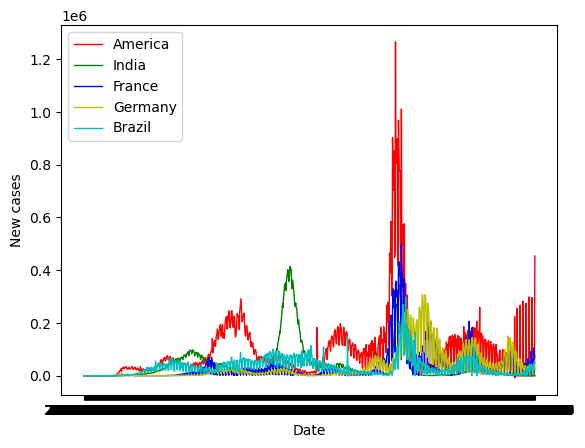

In [71]:
# 确诊数量前五
America_New_cases, Date_reported = America["New_cases"], America["Date_reported"]
plt.plot(Date_reported, America_New_cases,"-", color = "r",linewidth = 1, label="America")
India_New_cases, Date_reported = India["New_cases"], India["Date_reported"]
plt.plot(Date_reported, India_New_cases,"-", color = "g",linewidth = 1, label="India")
France_New_cases, Date_reported = France["New_cases"], France["Date_reported"]
plt.plot(Date_reported, France_New_cases,"-", color = "b",linewidth = 1, label="France")
Germany_New_cases, Date_reported = Germany["New_cases"], Germany["Date_reported"]
plt.plot(Date_reported, Germany_New_cases,"-", color = "y",linewidth = 1, label="Germany")
Brazil_New_cases, Date_reported = Brazil["New_cases"], Brazil["Date_reported"]
plt.plot(Date_reported, Brazil_New_cases,"-", color = "c",linewidth = 1, label="Brazil")
plt.xlabel('Date')# 设置横轴标签
plt.ylabel('New cases')# 设置纵轴标签
plt.legend(loc="upper left")# 添加图例
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

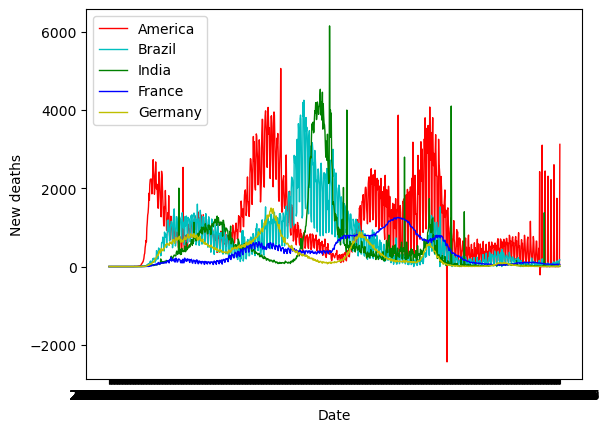

In [72]:
# 死亡数量前五
America_New_deaths, Date_reported = America["New_deaths"], America["Date_reported"]
plt.plot(Date_reported, America_New_deaths,"-", color = "r",linewidth = 1, label="America")
Brazil_New_deaths, Date_reported = Brazil["New_deaths"], Brazil["Date_reported"]
plt.plot(Date_reported, Brazil_New_deaths,"-", color = "c",linewidth = 1, label="Brazil")
India_New_deaths, Date_reported = India["New_deaths"], India["Date_reported"]
plt.plot(Date_reported, India_New_deaths,"-", color = "g",linewidth = 1, label="India")
Russian_Federation_New_deaths, Date_reported = Russian_Federation["New_deaths"], Russian_Federation["Date_reported"]
plt.plot(Date_reported, Russian_Federation_New_deaths,"-", color = "b",linewidth = 1, label="France")
Mexico_New_deaths, Date_reported = Mexico["New_deaths"], Mexico["Date_reported"]
plt.plot(Date_reported, Mexico_New_deaths,"-", color = "y",linewidth = 1, label="Germany")
plt.xlabel('Date')# 设置横轴标签
plt.ylabel('New deaths')# 设置纵轴标签
plt.legend(loc="upper left")# 添加图例
plt.show

Text(0.5, 1.0, 'Cases Sum Top 5')

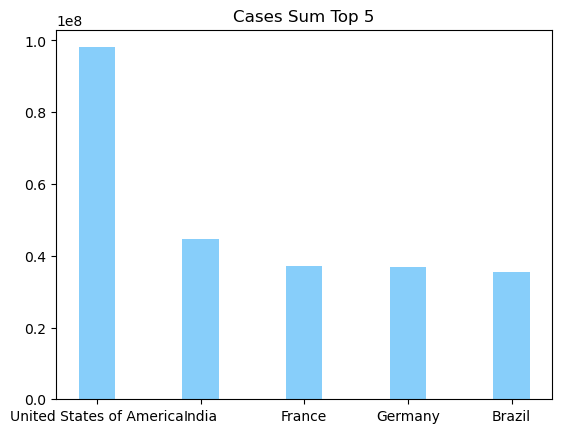

In [73]:
cases_sum_top = cases_sum_top.reset_index(drop=False)
Country, Cases_sum = cases_sum_top['Country'],cases_sum_top['cases_sum']
# 柱子的宽度
width=0.35
# 绘制柱状图 , 每根柱子的颜色为蓝色
plt.bar(Country, Cases_sum, width, label="Cases Sum Top 5", color="#87CEFA")
plt.title("Cases Sum Top 5")# 添加标题

Text(0.5, 1.0, 'Deaths Sum Top 5')

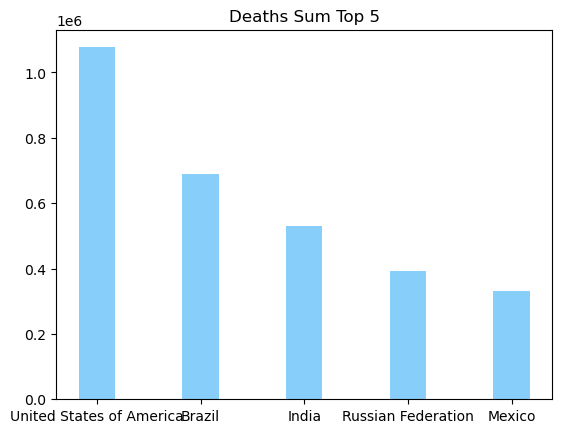

In [74]:
deaths_sum_top = deaths_sum_top.reset_index(drop=False)
Country, Deaths_sum = deaths_sum_top['Country'],deaths_sum_top['deaths_sum']
# 柱子的宽度
width=0.35
# 绘制柱状图 , 每根柱子的颜色为蓝色
plt.bar(Country, Deaths_sum, width, label="Cases Sum Top 5", color="#87CEFA")
plt.title("Deaths Sum Top 5")# 添加标题

In [75]:
data_summary = data_summary.loc[:,["cases_sum","deaths_sum"]].reset_index(drop=False)
data_summary

,Country,cases_sum,deaths_sum
0,United States of America,98080701,1077016
1,Republic of Korea,27611555,30975
2,France,37252086,155936
3,Viet Nam,11519011,43213
4,India,44675193,530653
...,...,...,...
232,Holy See,26,0
233,Pitcairn Islands,4,0
234,Tokelau,0,0
235,Democratic People's Republic of Korea,0,0


In [76]:
cases_sum_top.loc[5] =['other',(data_summary['cases_sum'].sum() - cases_sum_top['cases_sum'].sum())]
deaths_sum_top.loc[5] =['other',(data_summary['deaths_sum'].sum() - deaths_sum_top['deaths_sum'].sum())]

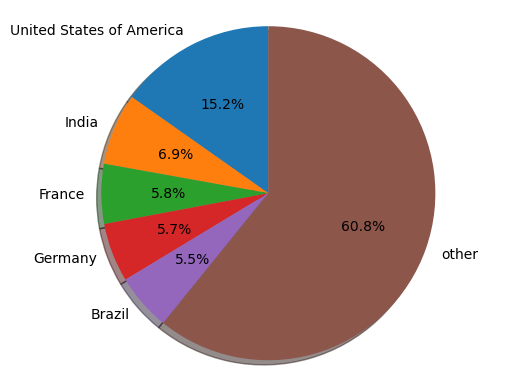

In [83]:
#确诊前五+other
labels = cases_sum_top['Country']
fig1, ax1 = plt.subplots()
ax1.pie(cases_sum_top['cases_sum'], labels = cases_sum_top['Country'],
        autopct='%1.1f%%', shadow=True,
        startangle=90)
ax1.axis('equal')  # 确保饼图是个圆形
plt.show()

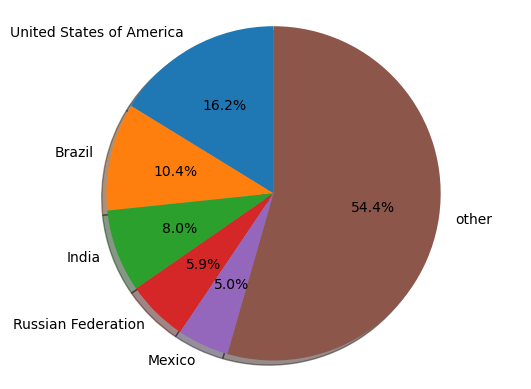

In [84]:
#死亡前五+other
labels = deaths_sum_top['Country']
fig1, ax1 = plt.subplots()
ax1.pie(deaths_sum_top['deaths_sum'], labels = deaths_sum_top['Country'],
        autopct='%1.1f%%', shadow=True,
        startangle=90)
ax1.axis('equal')  # 确保饼图是个圆形
plt.show()